## Handling missing values

In [3]:
import seaborn as sns


In [4]:
df = sns.load_dataset("titanic")

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
df["age"]

age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

### 1. mean value emputation

<Axes: xlabel='age', ylabel='Count'>

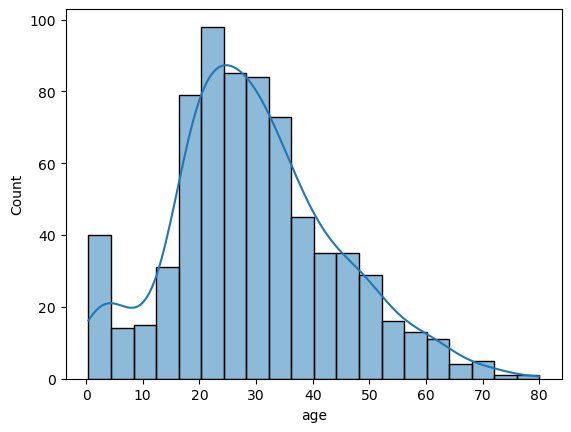

In [10]:
sns.histplot(df["age"],kde=True)

In [11]:
# fill with mean values

df["age_new"] = df["age"].fillna(df["age"].mean())

In [12]:
df[["age","age_new"]]

,age,age_new
0,22.0,22.000000
1,38.0,38.000000
2,26.0,26.000000
3,35.0,35.000000
4,35.0,35.000000
...,...,...
886,27.0,27.000000
887,19.0,19.000000
888,NaN,29.699118
889,26.0,26.000000


<Axes: xlabel='age_new', ylabel='Count'>

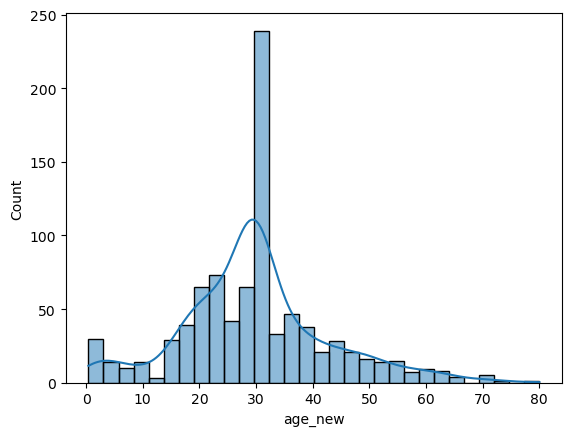

In [13]:
sns.histplot(df["age_new"],kde=True)

In [14]:
df["deck"].value_counts()

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [15]:
df["deck"].isnull().sum()

688

In [ ]:
# mediun value imputation -- if we have outlires


<Axes: ylabel='age'>

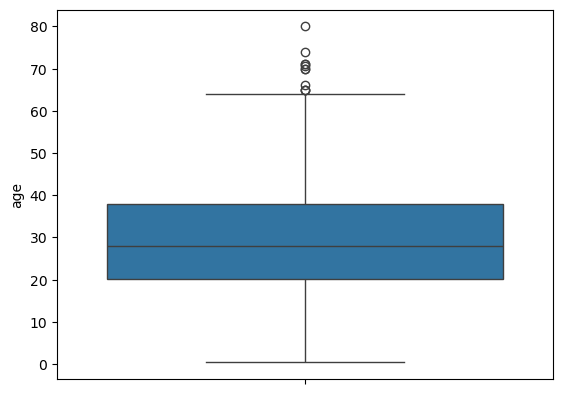

In [17]:
sns.boxplot(df["age"])

In [18]:
df["age_median"] = df["age"].fillna(df["age"].median())
df[["age_median","age"]]

,age_median,age
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,28.0,NaN
889,26.0,26.0


<Axes: xlabel='age', ylabel='Count'>

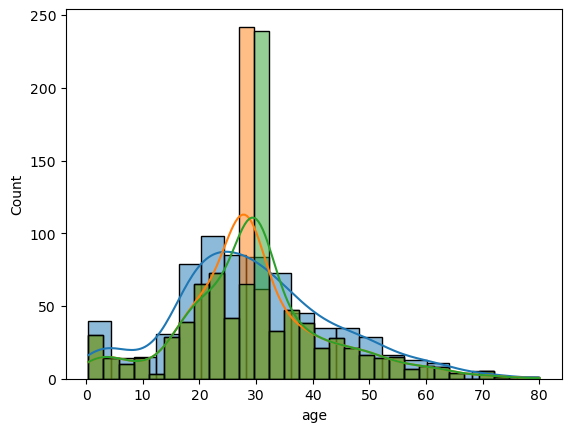

In [25]:
sns.histplot(df["age"],kde=True)
sns.histplot(df["age_median"],kde=True)
sns.histplot(df["age_new"],kde=True)

In [28]:
# mode value imputation -- on categorical value
df["embarked"].isnull().sum()

2

In [30]:
df["embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [29]:
df[df["embarked"].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_new,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [35]:
df["embarked"].mode()[0]

'S'

In [37]:
df["embarked_new"] = df["embarked"].fillna(df["embarked"].mode()[0])

In [38]:
df["embarked_new"].value_counts()

embarked_new
S    646
C    168
Q     77
Name: count, dtype: int64

In [39]:
df["embarked"].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64